# Other common physical Hamiltonians

Note:
- To ensure that this file runs properly, please first create the **data/** under the current directory.
- Here is an example of n=6. In the paper, n=10.
- Runtime 3 mins for n=6. Runtime more than 2 hrs for n=10 on a laptop.

In [4]:
from quantum_simulation_recipe.plot_config import *
from quantum_simulation_recipe.bounds import tight_bound
# from quantum_simulation_recipe.spin import Nearest_Neighbour_1d
from quantum_simulation_recipe.spin import Nearest_Neighbour_1d, Power_Law
from quantum_simulation_recipe.fermion import Hydrogen_Chain, hubbard_openfermion
from quantum_simulation_recipe.trotter import pf, expH
from evolution import Evolve_ob, Evolve_state
from qiskit.quantum_info import DensityMatrix, Statevector
from states import ghz_state, random_states
import numpy as np

good_color_cycle = ['#9467bdFF', '#2ca02cFF', '#d62728FF', '#1f77b4FF', '#ff7f0eFF', '#8c564bFF', '#e377c2FF', '#7f7f7fFF', '#bcbd22FF', '#17becfFF']
set_color_cycle(good_color_cycle)
set_fontsize(medium=MEDIUM_SIZE+16, large=LARGE_SIZE+12, linewidth=2.5)

mpl.rcParams['savefig.transparent'] = True
mpl.rcParams['axes.grid'] = False
mpl.rcParams['legend.frameon'] = False

plt.rc('legend', fontsize=MEDIUM_SIZE+1) 
# plt.rc('xtick', labelsize=MEDIUM_SIZE)  # fontsize of the tick labels
# plt.rc('ytick', labelsize=MEDIUM_SIZE) 

# 'Helvetica'  sans-serif
# mpl.rcParams['font.family'] = 'Helvetica'  
mpl.rcParams['font.family'] = 'sans-serif'  
fig_dir, data_dir = './figs', './data'

## Fermi Hubbard, Hydrogen Chain, Power Law

In [13]:
# set parameters
U = 1
n = 6
t = 5
r = 100
gamma = 9e-3

# model_list = ['hydrogen_chain']
model_list = ['fermi_hubbard', 'hydrogen_chain', 'power_law']

# dictionary of data
data_physical_models = {}

for model in model_list:

    # compute model Hamiltonian
    if model == 'fermi_hubbard':
        hubbard = hubbard_openfermion(n//2, U=U, verbose=True)
        h_list = [sum(hubbard.one_body_01_sparse), sum(hubbard.one_body_23_sparse), sum(hubbard.two_body_sparse)]
    elif model == 'hydrogen_chain':
        chain_length = n//2
        bond_length = 1.2
        hc = Hydrogen_Chain(chain_length=chain_length, bond_length=bond_length)
        # h_list = [term.toarray() for term in hc.h_group]
        h_list = [term.to_matrix() for term in hc.h_group]
    elif model == 'power_law':
        alpha = 4
        hz = 0.2
        pl = Power_Law(n=n, alpha=alpha, hz=hz, Jx=1, Jy=1, Jz=1)
        h_list = [H.to_matrix() for H in pl.ham_xyz]

    # compute evolution unitary
    U_dt = pf(h_list, t/r, 1)
    U_dt_exact = expH(sum(h_list), t/r)

    # initialize input state
    plus_input = DensityMatrix(Statevector.from_label('+'*n))
    # zero_input = DensityMatrix(ghz_state(n))
    # zero_input = random_states(n, 1, True)[0]

    # compute state evolution
    plus_data = Evolve_state(U_dt, U_dt_exact, r, plus_input, gamma, 2, t, detail=True)
    naive_alg_bnd = tight_bound(h_list, 2, t/r, 1, verbose=True)

    # store in dictionary of data
    plus_data_dict = { 'phy': plus_data.phy_err_list, 'alg': plus_data.alg_err_list, 'phy_bnd': [n * gamma]*r, 'alg_bnd': [naive_alg_bnd]*r, 'tr_dist': plus_data.tr_dist_list}
    data_physical_models[model] = plus_data_dict
# np.save(f'./data/physical_models_n={n}.npy', data_physical_models)

one_body_terms: 
 [-1.0 [0^ 2] +
-1.0 [2^ 0], -1.0 [1^ 3] +
-1.0 [3^ 1], -1.0 [2^ 4] +
-1.0 [4^ 2], -1.0 [3^ 5] +
-1.0 [5^ 3]]
one_body_L:  4
one_body[0]: 
   (4, 1)	(-1+0j)
  (6, 3)	(1+0j)
  (1, 4)	(-1+0j)
  (3, 6)	(1+0j)


  0%|          | 0/100 [00:00<?, ?it/s]

logm result may be inaccurate, approximate err = 2.9554230799858404e-07
logm result may be inaccurate, approximate err = 2.9554230799858404e-07
logm result may be inaccurate, approximate err = 2.9554230799858404e-07


100%|██████████| 100/100 [01:02<00:00,  1.61it/s]

c1=7.20526752916779, c2=16.12886906759315


# pstr: 62, ['IIIIII', 'ZIIIII', 'YZZZYI', 'XZZZXI', 'IZIIII', 'IYZZZY', 'IXZZZX', 'IIZIII', 'IIIZII', 'IIIIZI', 'IIIIIZ', 'ZZIIII', 'YIZZYI', 'XIZZXI', 'YXXYII', 'YYXXII', 'XXYYII', 'XYYXII', 'ZYZZZY', 'ZXZZZX', 'YXIIXY', 'YYIIXX', 'XXIIYY', 'XYIIYX', 'ZIZIII', 'YZIZYI', 'XZIZXI', 'ZIIZII', 'YZZIYI', 'XZZIXI', 'YZYYZY', 'YZYXZX', 'XZXYZY', 'XZXXZX', 'ZIIIZI', 'ZIIIIZ', 'YZZZYZ', 'XZZZXZ', 'IZZIII', 'IYIZZY', 'IXIZZX', 'IYXXYI', 'IYYXXI', 'IXXYYI', 'IXYYXI', 'IZIZII', 'IYZIZY', 'IXZIZX', 'IZIIZI', 'IYZZIY', 'IXZZIX', 'IZIIIZ', 'IIZZII', 'IIYXXY', 'IIYYXX', 'IIXXYY', 'IIXYYX', 'IIZIZI', 'IIZIIZ', 'IIIZZI', 'IIIZIZ', 'IIIIZZ']
# groups 7


100%|██████████| 100/100 [00:57<00:00,  1.74it/s]


c1=0.21121429873856432, c2=0.2998856278216479


100%|██████████| 100/100 [01:02<00:00,  1.61it/s]

c1=207.46174172916298, c2=107.49992315343519


## Hamiltonians Plot

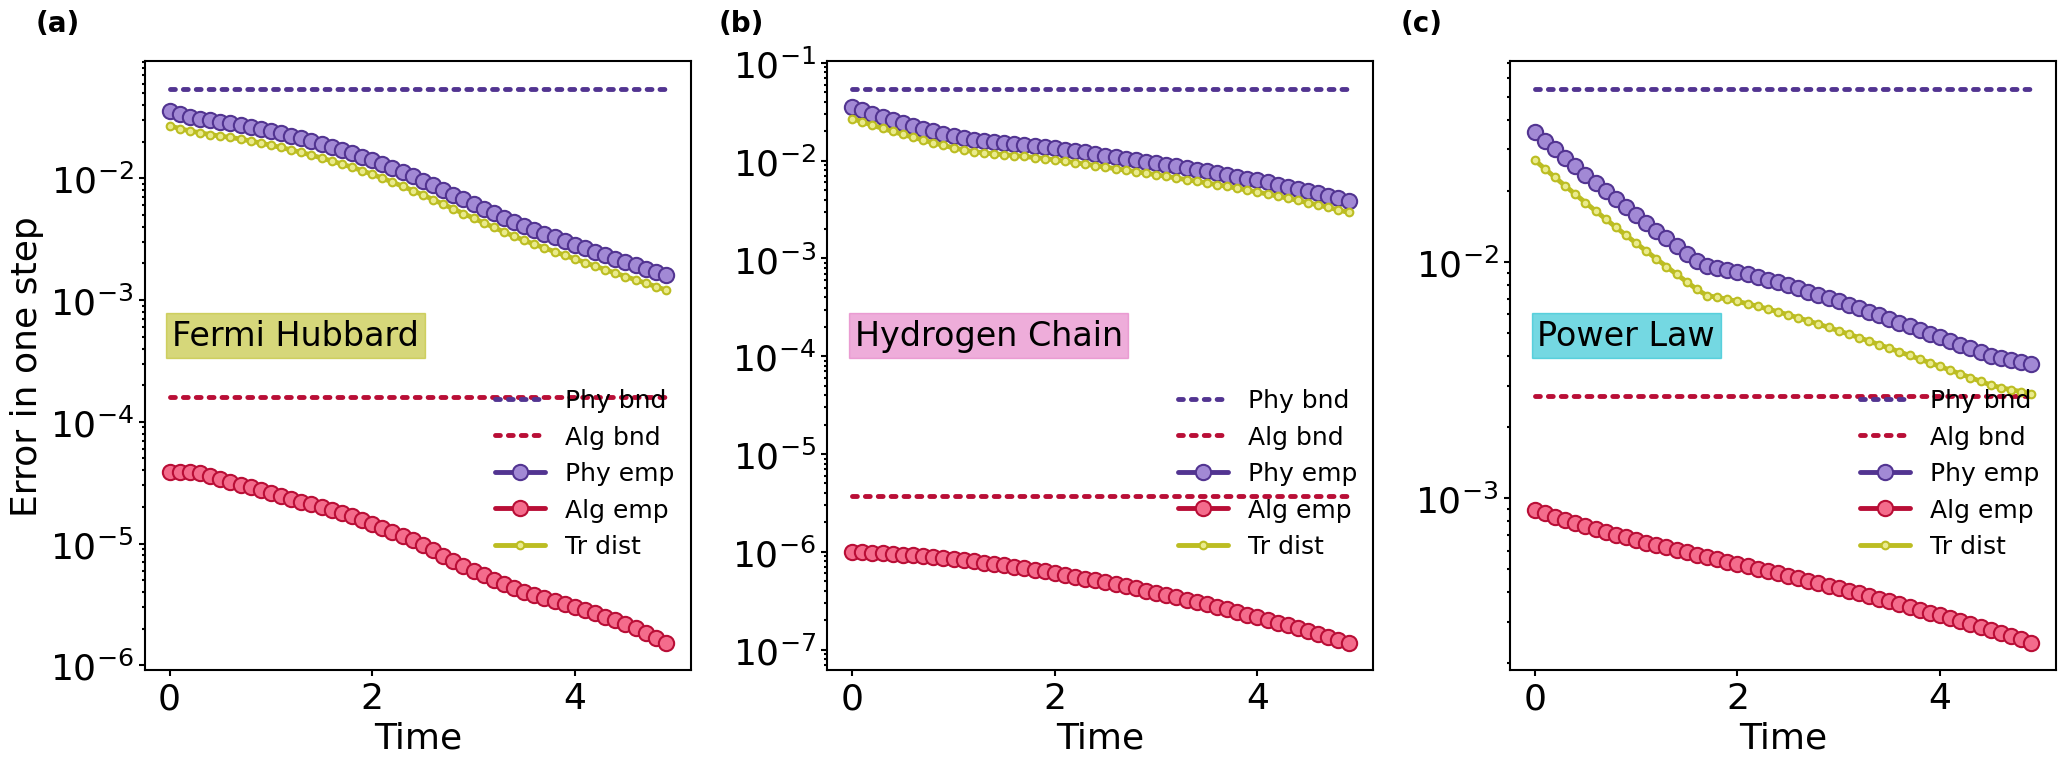

In [14]:
from quantum_simulation_recipe.plot_config import *

# set format
good_color_cycle = ['#9467bdFF', '#2ca02cFF', '#d62728FF', '#1f77b4FF', '#ff7f0eFF', '#8c564bFF', '#e377c2FF', '#7f7f7fFF', '#bcbd22FF', '#17becfFF']
set_color_cycle(good_color_cycle)
set_fontsize(medium=MEDIUM_SIZE, large=LARGE_SIZE+2, linewidth=1.5)

plt.rc('legend', fontsize=MEDIUM_SIZE) 

mpl.rcParams['savefig.transparent'] = True
mpl.rcParams['axes.grid'] = False
mpl.rcParams['font.family'] = 'sans-serif'  
mpl.rcParams['legend.frameon'] = False

fig, ax = plt.subplots(1, 3, figsize=(21, 8))

# set parameters and data
n = 6
t = 5
r = 100
data_all = data_physical_models

# set model names and tag names
model_list = ['fermi_hubbard', 'hydrogen_chain', 'power_law']
tag_list = ['Fermi Hubbard', 'Hydrogen Chain', 'Power Law']

# set color
gd_idx = 8
gc = GradColors(10)
cm_phy, cm_alg, cm_tot = gc.purple, gc.red, gc.green
tag_colors = ['#bcbd22FF', '#e377c2FF', '#17becfFF']
approx_color = [good_color_cycle[-2], good_color_cycle[4]]
phy_plot_color, alg_plot_color, tot_plot_color = cm_phy(gd_idx), cm_alg(gd_idx-1), cm_tot(gd_idx)

# set style
lw_wide = 3.5

# set time data and number of points
plot_num = 50
every_k_points = r // plot_num
t_list = np.arange(r) * t/r

# plot data
for i, model_name in enumerate(model_list):

    data_plot = data_all[model_name]

    plot_evo(ax[i], t_list[::every_k_points], data_plot['phy_bnd'][::every_k_points], ':', label=f'Phy bnd', c=phy_plot_color, lw=lw_wide)

    plot_evo(ax[i], t_list[::every_k_points], data_plot['alg_bnd'][::every_k_points], ':', label=f'Alg bnd', c=alg_plot_color, lw=lw_wide)

    # plot_evo(ax[i], t_list[::every_k_points], 0.5*np.array(plus_data.phy_err_list[::every_k_points]), 'o-', label=f'Phy emp', c=phy_plot_color, lw=width_idx)
    plot_evo(ax[i], t_list[::every_k_points], data_plot['phy'][::every_k_points], 'o-', label=f'Phy emp', c=phy_plot_color, lw=lw_wide)
    plot_evo(ax[i], t_list[::every_k_points], data_plot['alg'][::every_k_points], 'o-', label=f'Alg emp', c=alg_plot_color, lw=lw_wide)
    plot_evo(ax[i], t_list[::every_k_points], data_plot['tr_dist'][::every_k_points], '.-', label=f'Tr dist', c=approx_color[0], lw=lw_wide)

    ax[i].set_yscale('log')

    ax[i].legend(loc='upper left', bbox_to_anchor=(0.6, 0.5))
    # ax[i].legend(loc='lower left')

    bbox_props = dict(facecolor=tag_colors[i], alpha=.6, edgecolor=tag_colors[i])

    # ax[i].text(0.3, 0.65, tag_list[i], color='black', bbox=dict(facecolor=tag_colors[i], alpha=.6, edgecolor=tag_colors[i]), fontsize=LARGE_SIZE, ha='left', va='bottom')

    ax[i].annotate(tag_list[i], xy=(0.05, 0.55), xycoords='axes fraction', fontsize=LARGE_SIZE, ha='left', va='center', bbox=bbox_props)
    ax[i].text(-.2, 1.05, ['(a)', '(b)', '(c)'][i], size=20, transform=ax[i].transAxes, weight='bold')

    ax[i].set_xlabel(r'Time')

ax[0].set_ylabel(r'Error in one step')

fig.savefig(f'figs/decay_plot_n={n}.pdf', bbox_inches='tight')